<a href="https://colab.research.google.com/github/aliasghar211/EPL-MachineLearning/blob/main/21100187_21100124_MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Div = League Division X
# Date = Match Date (dd/mm/yy) X 

# FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)

# HomeTeam = ghar Team 
# AwayTeam = Away Team

# (HTHG = Half Time Home Team Goals + HTAG = Half Time Away Team Goals)

# -- OR -- 

# HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)



# FTHG = Full Time Home Team Goals X
# FTAG = Full Time Away Team Goals X

# Match Statistics (where available)
# Attendance = Crowd Attendance
# Referee = Match Referee
# HS = Home Team Shots
# AS = Away Team Shots
# HST = Home Team Shots on Target
# AST = Away Team Shots on Target
# HHW = Home Team Hit Woodwork
# AHW = Away Team Hit Woodwork
# HC = Home Team Corners
# AC = Away Team Corners
# HF = Home Team Fouls Committed
# AF = Away Team Fouls Committed
# HO = Home Team Offsides
# AO = Away Team Offsides


# HY = Home Team Yellow Cards
# AY = Away Team Yellow Cards
# HR = Home Team Red Cards
# AR = Away Team Red Cards

# -- OR --

# HBP = Home Team Bookings Points (10 = yellow, 25 = red)
# ABP = Away Team Bookings Points (10 = yellow, 25 = red)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = '/content/drive/MyDrive/ML_EPL/2000-01.csv'

In [ ]:
dataset00 = pd.read_csv(data_path)

dataset00.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,Referee,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,20043,Rob Harris,17,8,14,4,2,1,6,6,13,12,8,6,1,2,0,0
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,34914,Graham Barber,17,12,10,5,1,0,7,7,19,14,2,3,1,2,0,0
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,20624,Barry Knight,6,16,3,9,0,1,8,4,15,21,1,3,5,3,1,0
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,27223,Andy D'Urso,6,13,4,6,0,0,5,8,11,13,0,2,1,1,0,0
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,40010,Dermot Gallagher,17,12,8,6,0,0,6,4,21,20,6,1,1,3,0,0


In [ ]:
team_list = np.array(dataset00['HomeTeam'].append(dataset00['AwayTeam'], ignore_index=True).drop_duplicates(inplace=False))
referee_list = np.array(dataset00['Referee'].drop_duplicates(inplace=False))
result_list = np.array(['H','D','A'])

for i in range(len(dataset00)):
  dataset00['HomeTeam'].iloc[i] = np.where(team_list == dataset00['HomeTeam'].iloc[i])[0][0]
  dataset00['AwayTeam'].iloc[i] = np.where(team_list == dataset00['AwayTeam'].iloc[i])[0][0]

  dataset00['Referee'].iloc[i] = np.where(referee_list == dataset00['Referee'].iloc[i])[0][0]
  dataset00['FTR'].iloc[i] = np.where(result_list == dataset00['FTR'].iloc[i])[0][0]
  dataset00['HTR'].iloc[i] = np.where(result_list == dataset00['HTR'].iloc[i])[0][0]

dataset00.drop(labels=['Div','Date',"FTHG","FTAG"],axis=1,inplace=True)

dataset00.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,Attendance,Referee,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR
0,0,15,0,2,0,0,20043,0,17,8,14,4,2,1,6,6,13,12,8,6,1,2,0,0
1,1,18,0,1,0,0,34914,1,17,12,10,5,1,0,7,7,19,14,2,3,1,2,0,0
2,2,13,2,1,1,1,20624,2,6,16,3,9,0,1,8,4,15,21,1,3,5,3,1,0
3,3,17,1,1,2,2,27223,3,6,13,4,6,0,0,5,8,11,13,0,2,1,1,0,0
4,4,14,0,2,0,0,40010,4,17,12,8,6,0,0,6,4,21,20,6,1,1,3,0,0


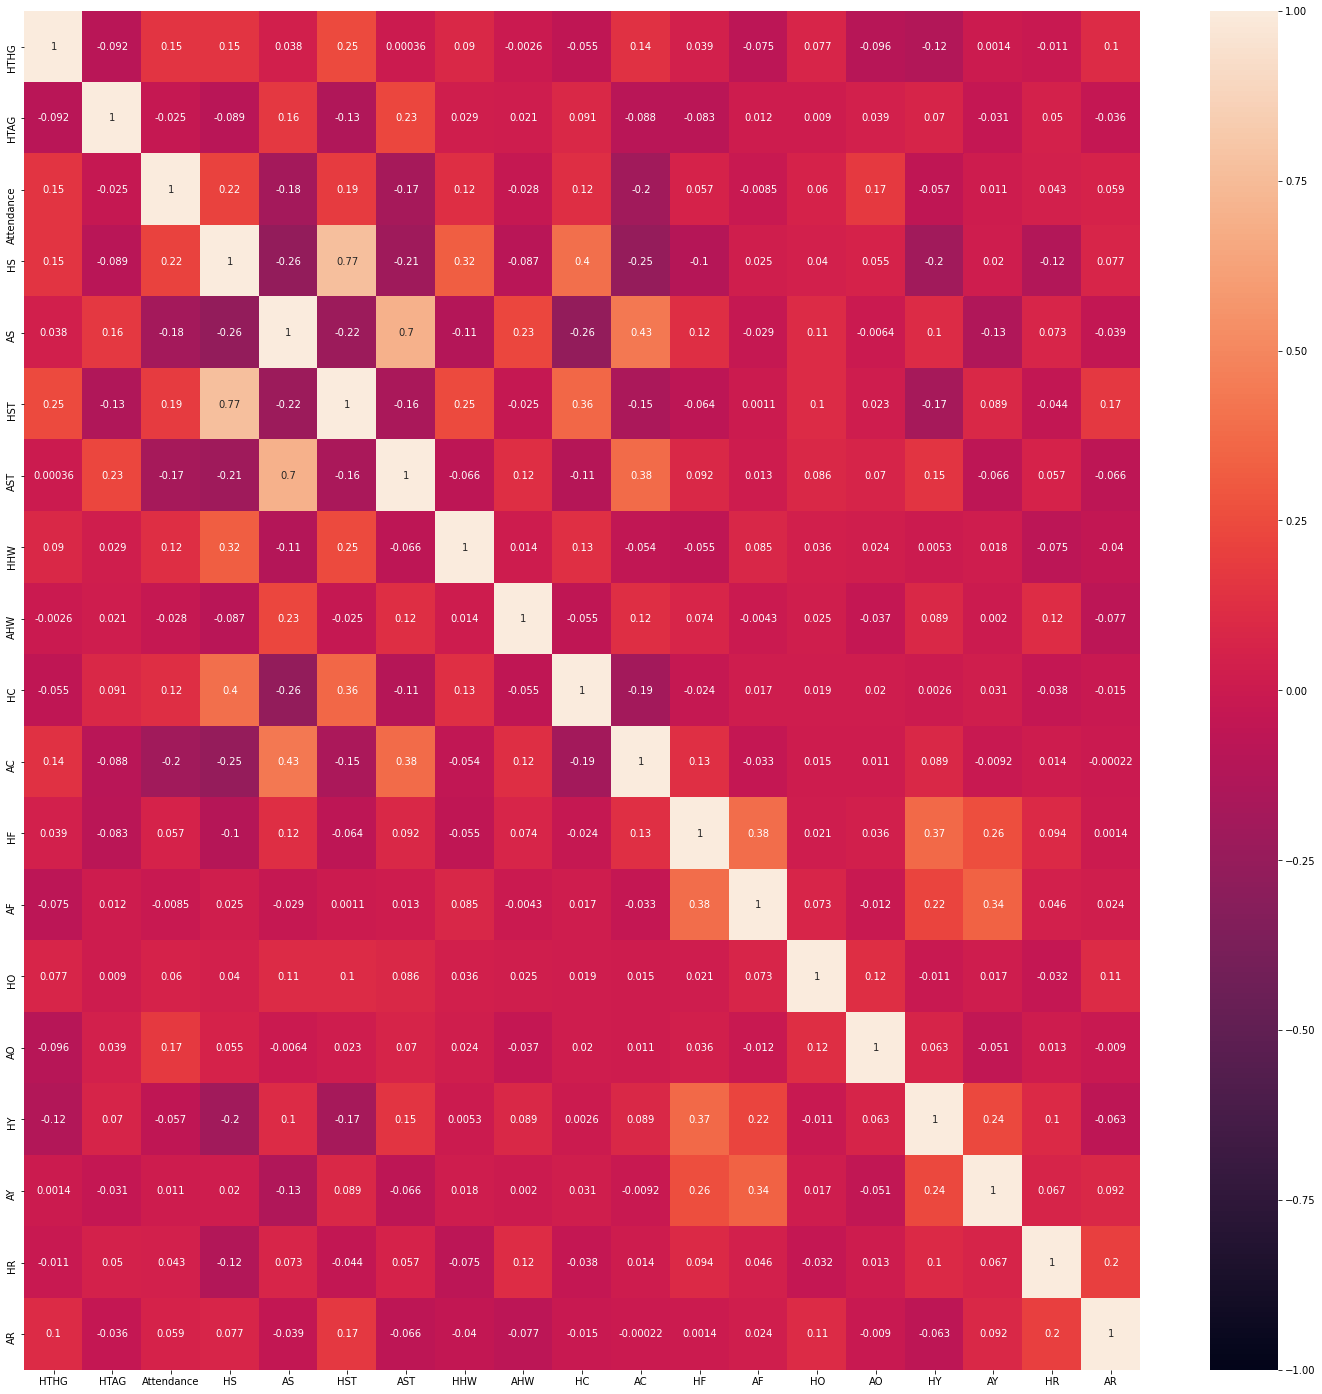

In [ ]:
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(dataset00.corr('pearson'), vmin=-1, vmax=1, annot=True)

In [ ]:
tt_split = 0.9

y_train = dataset00[:int(tt_split * np.shape(dataset00)[0])]['FTR']
y_test  = dataset00[int(tt_split * np.shape(dataset00)[0]):]['FTR']

x_train = dataset00[:int(tt_split * np.shape(dataset00)[0])].drop(labels=['FTR'], axis=1)
x_test  = dataset00[int(tt_split * np.shape(dataset00)[0]):].drop(labels=['FTR'], axis=1)

In [ ]:
val_split = 0.8

y_val  = y_train[int(val_split * np.shape(dataset00)[0]):]
y_train = y_train[:int(val_split * np.shape(dataset00)[0])]

x_val  = x_train[int(val_split * np.shape(dataset00)[0]):]
x_train = x_train[:int(val_split * np.shape(dataset00)[0])]

In [ ]:
np.shape(x_train), np.shape(y_train), np.shape(x_val), np.shape(y_val)

((304, 23), (304,), (38, 23), (38,))

In [ ]:
x_train.head(2)

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,Attendance,Referee,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR
0,0,15,2,0,0,20043,0,17,8,14,4,2,1,6,6,13,12,8,6,1,2,0,0
1,1,18,1,0,0,34914,1,17,12,10,5,1,0,7,7,19,14,2,3,1,2,0,0


In [ ]:
import numpy as np
>>> rng = np.random.RandomState(1)
>>> X = rng.randint(5, size=(6, 100))
>>> y = np.array([1, 2, 3, 4, 5, 6])
>>> from sklearn.naive_bayes import CategoricalNB
>>> clf = CategoricalNB()
>>> clf.fit(X, y)
CategoricalNB()
>>> print(clf.predict(X[2:3]))
[3]

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
clf = CategoricalNB()
clf.fit(np.array(x_train).astype(np.uint8), np.array(y_train).astype(np.uint8))

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
clf.predict(x_val[0])

In [ ]:
np.array(x_val)[0].astype(np.float)

array([0.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       2.0043e+04, 1.2000e+01, 1.6000e+01, 5.0000e+00, 9.0000e+00,
       1.0000e+00, 2.0000e+00, 0.0000e+00, 6.0000e+00, 2.0000e+00,
       1.2000e+01, 9.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
       2.0000e+00, 0.0000e+00, 0.0000e+00])